## 6.1 결정 트리 학습과 시각화

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris()
X = iris.data[:, 2:] #꽃잎의 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [10]:
import os
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
image_path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

파이썬 3.8 이상은 지원안됨 -> plot_tree함수 사용 가능 

In [11]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clf,
                out_file = image_path("iris_tree.dot"),
               feature_names=iris.feature_names[2:],
               class_names=iris.target_names,
               rounded=True,
               filled=True
               )

TypeError: 'str' object is not callable

## 6.2 예측하기

루트 노드 : 깊이가 0인 맨 꼭대기의 노드
#### 
자식 노드
#### 
리프 노드 : 자식 노드를 가지지 않는 노드

결정 트리의 여러 장점 중 하나는 데이터 전처리가 거의 필요하지 않다는 것. 
특성의 스케일을 맞추거나 평균을 원점에 맞추는 작업이 필요하지 않음.

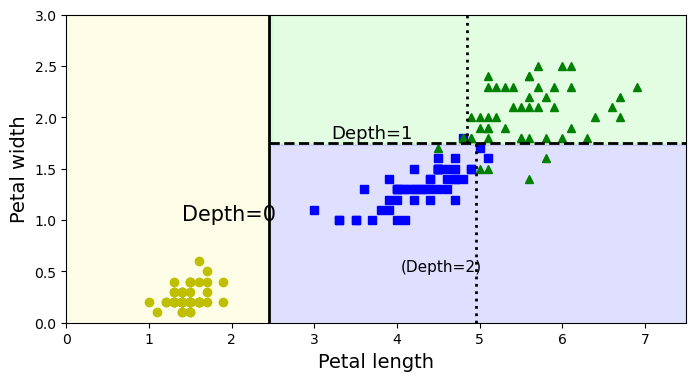

In [14]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

화이트 박스 모델 : 직관적이고 결정 방식을 이해하기 쉬움, 결정트리 
### 
블랙 박스 모델 : 성능이 뛰어나고 예측을 만드는 연산 과정을 쉽게 확인할 수 있음. 하지만 왜 그런 예측을 만드는지 쉽게 설명하기 어려움 


## 6.3 클래스 확률 추정

In [15]:
# 결정 트리는 한 샘플이 특정 클래스 k에 속할 확률을 추정할 수 있음
tree_clf.predict_proba([[5,1.5]]) # 꽃잎 길이가 5, 너비가 1.5


array([[0.        , 0.90740741, 0.09259259]])

In [16]:
tree_clf.predict([[5,1.5]])

array([1])

## 6.4 CART 훈련 알고리즘

CART 알고리즘이 훈련 세트를 성공적으로 둘로 나누었다면 같은 방식으로 서브셋을 또 
나누고 그다음엔 서브셋의 서브셋을 나누고 이런 식으로 계속 반복한다.
이 과정은 최대 깊이가 되면 중지하거나 불순도를 줄이는 분할을 찾을 수 없을 때
멈추게 된다. 

## 6.5 계산 복잡도

훈련 알고리즘은 각 노드에서 모든 훈련 샘플의 모든 특성을 비교한다. 
훈련 세트가 작을 경우 사이킷런(presort=True) 미리 데이터를 정렬하여 훈련 속도를 높일 
수 있다. 하지만 훈련 세트가 클 경우에는 속도가 많이 느려진다.

## 6.6 지니 불순도 또는 엔트로피?

기본적으로 지니 불순도가 사용되지만 criterion 매개변수를 'entropy'로 지정하여
엔트로피 불순도를 사용할 수 있다. 엔트로피는 분자의 무질서함을 측정하는 것으로 
원래 열역학의 개념이다. 분자가 안정되고 질서 정연하면 엔트로피가 0에 가까워진다. 
어떤 세트가 한 클래스의 샘플만 담고 있다면 엔트로피가 0이 된다.

## 6.7 규제 매개변수

훈련 데이터에 대한 과대적합을 피하기 위해 학습할 때 결정 트리의 자유도를 제한할 필요
가 있다. -> 규제, max_depth매개변수로 이를 조절, 줄이면 모델을 규제하게 되고 과대적합
의 위험이 감소한다. 

그림 저장: min_samples_leaf_plot


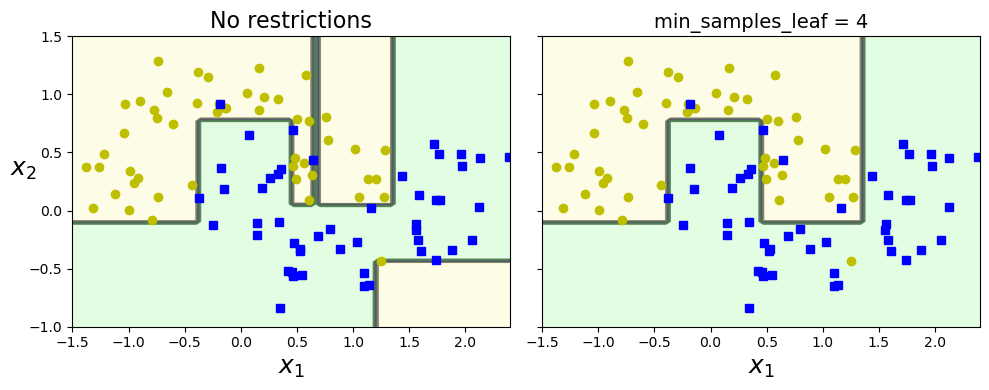

In [17]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

plt.show()

## 6.8 회귀

In [18]:
# 사이킷런의 결정트리를 사용해 잡음이 섞인 2차 함수 형태의 데이터셋에서 max_depth=2
# 설정으로 회귀 트리를 만들어봄
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=2)

In [20]:
# 2차식으로 만든 데이터셋 + 잡음
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

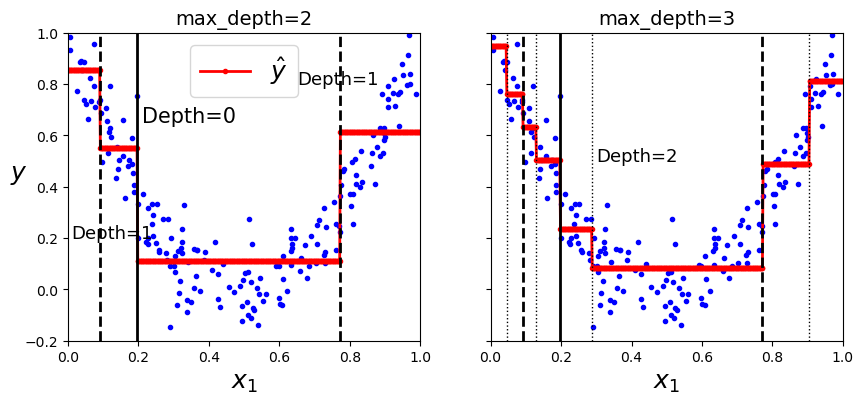

In [21]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

## 6.9 불안정성

결정 트리는 계단 모양의 결정 경계를 만든다. (모든 분할은 축에 수직이다.) 그래서 
훈련 세트의 회전에 민감하다. 

In [23]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X, y)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X, y, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

plt.show()

ValueError: Unknown label type: 'continuous'